In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data file
data = pd.read_csv('tumor.csv')
dataset = pd.DataFrame(data)
dataset.columns

Index(['ID', 'ClumpThickness', 'Cell_Size', 'Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Normal_Nucleoli',
       'Bland_Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell_Size                      699 non-null int64
Cell_Shape                     699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Normal_Nucleoli                699 non-null int64
Bland_Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal_Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland_Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [13]:
# Bare nuclei col is missing

temp = pd.DataFrame(dataset.Bare_Nuclei.str.isdigit())  
temp[temp['Bare_Nuclei'] == False]   

dataset = dataset.replace('?', np.nan)
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)


# converting the hp column from object 'Bare Nuclei'/ string type to float
dataset['Bare_Nuclei'] = dataset['Bare_Nuclei'].astype('float64')  


In [14]:
### Missing Values

In [15]:
dataset.isnull().sum()

ID                             0
ClumpThickness                 0
Cell_Size                      0
Cell_Shape                     0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Normal_Nucleoli                0
Bland_Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

C:\Users\MUKESHRAO_BGL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MUKESHRAO_BGL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


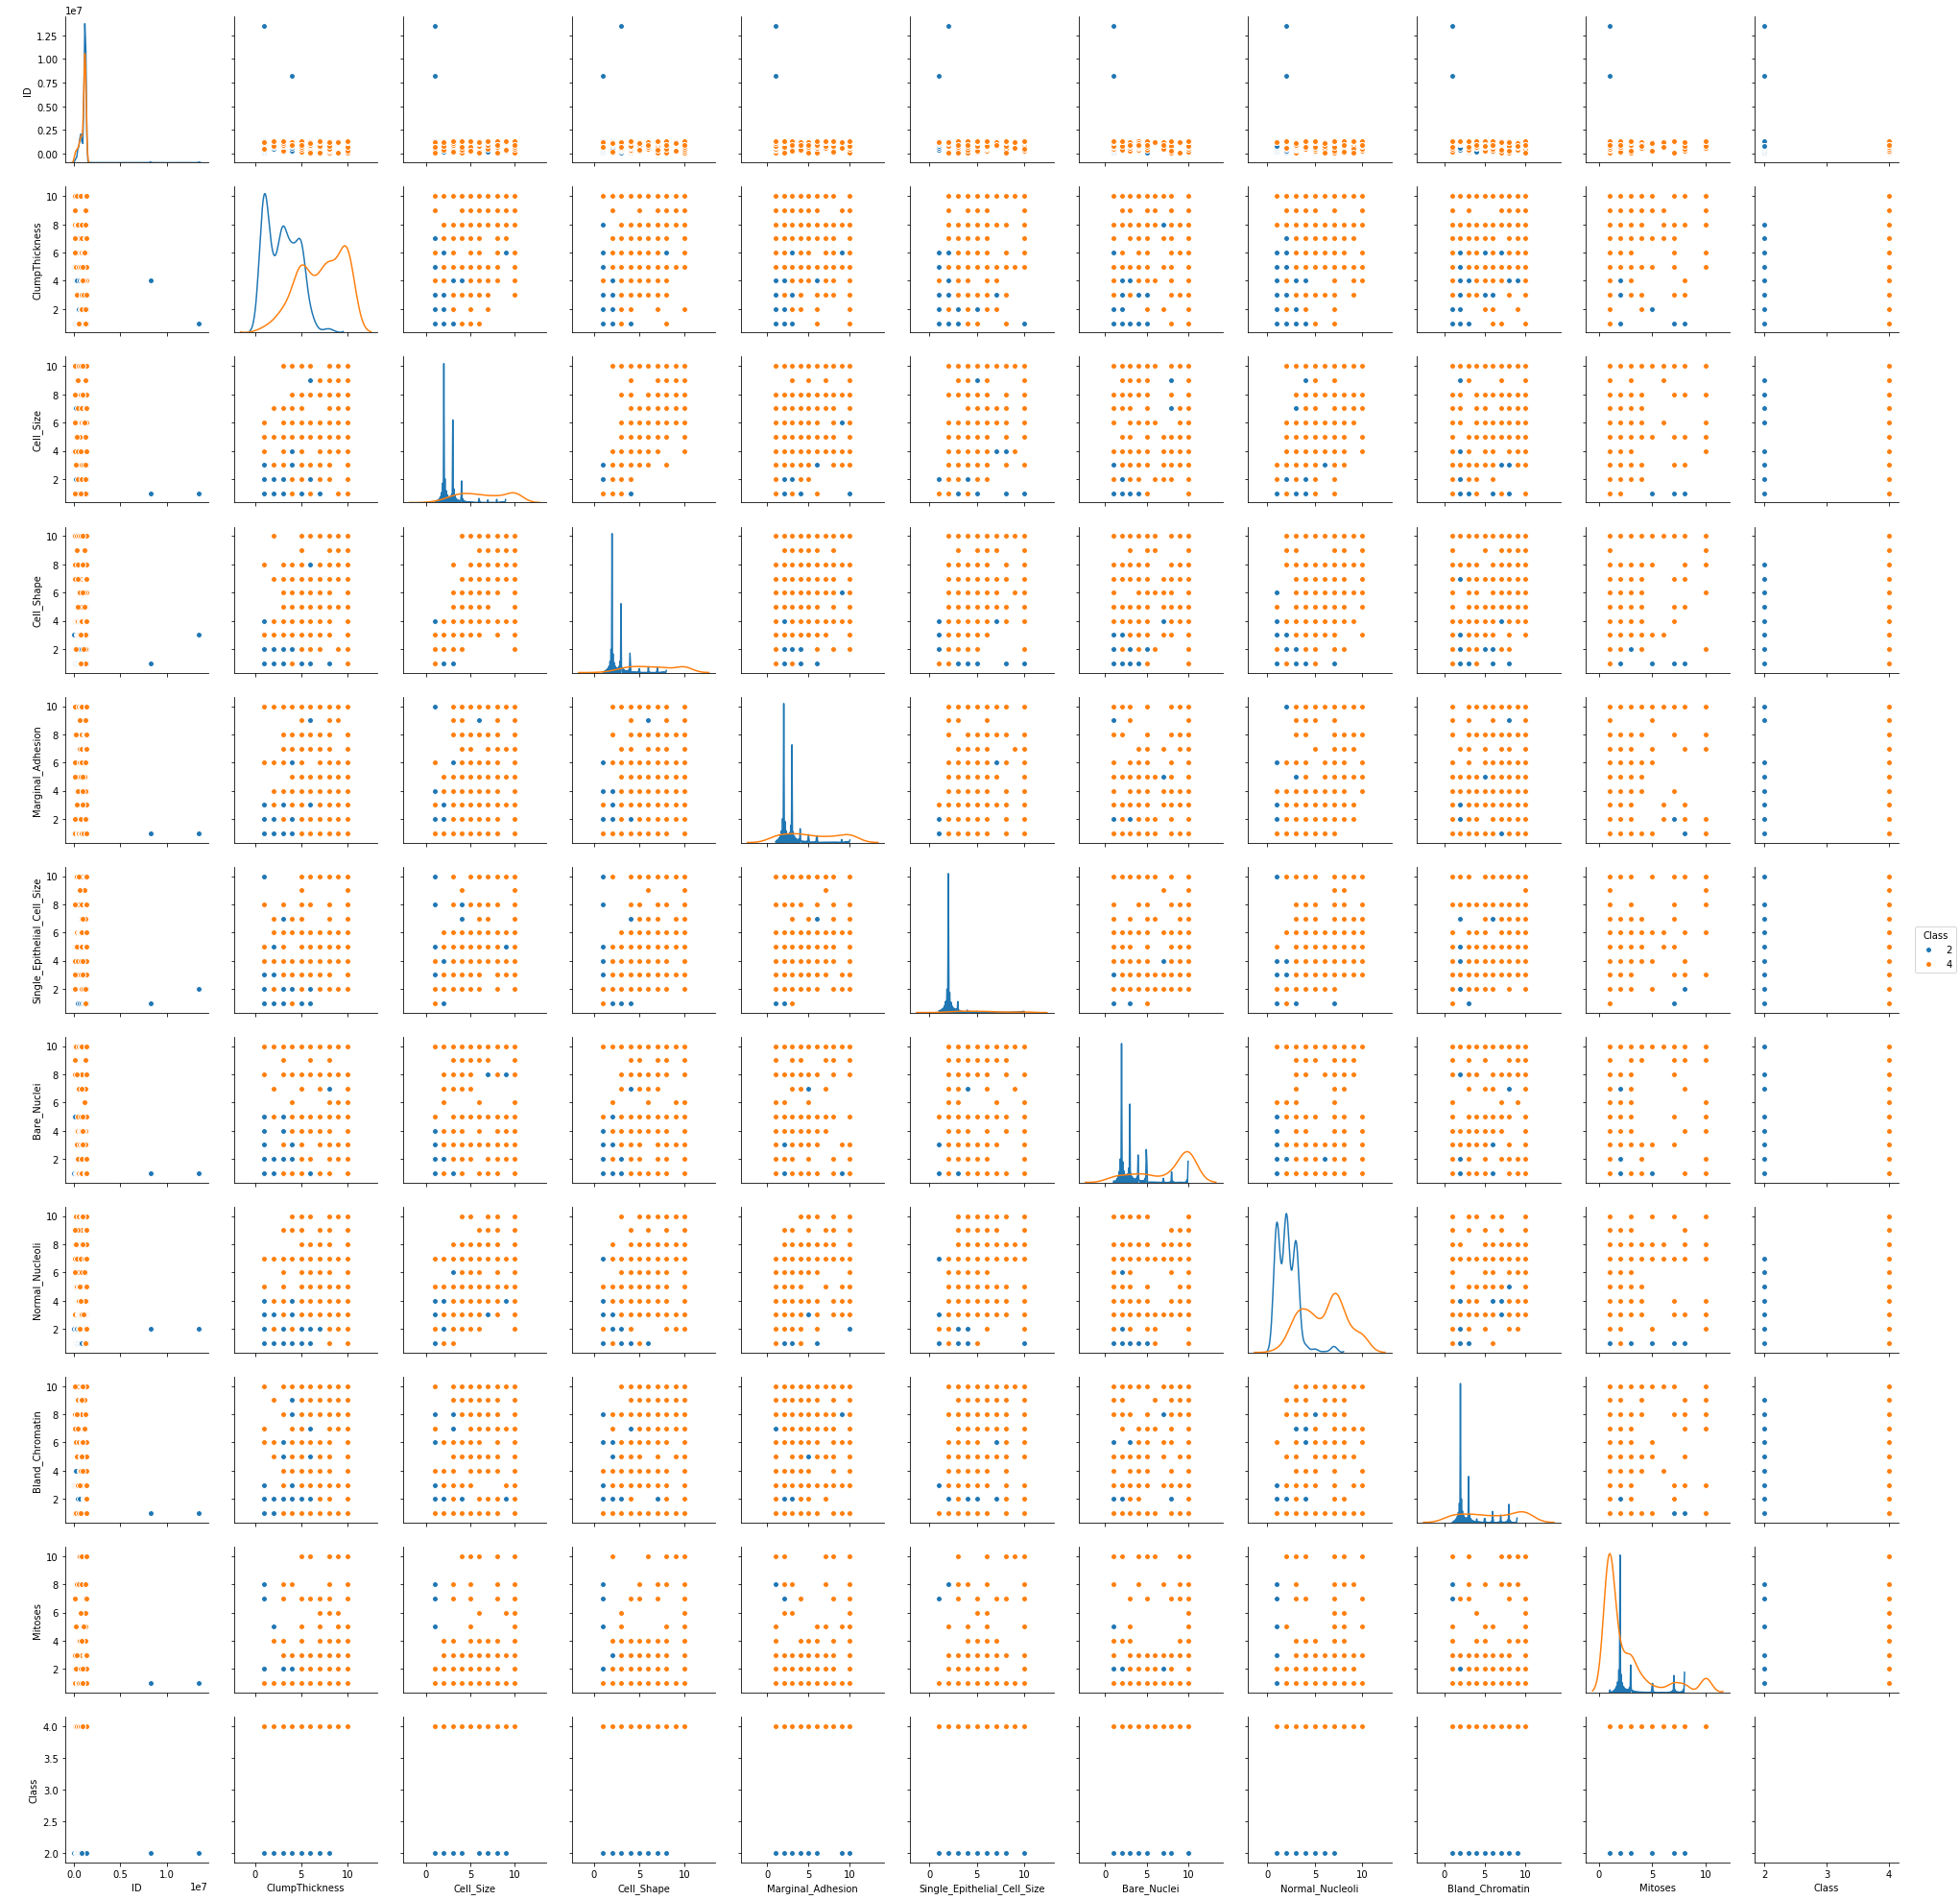

In [16]:
sns.pairplot(dataset, diag_kind = "kde", hue = "Class")

In [17]:
from sklearn.cross_validation import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = dataset["Class"]
features = dataset.drop(["ID","Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

C:\Users\MUKESHRAO_BGL\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)


In [30]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9749552772808586
0.9642857142857143


In [31]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

Confusion Matrix:
 [[95  2]
 [ 3 40]]


In [32]:
# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)


In [36]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.998211091234347
0.9571428571428572


In [37]:

# Building a Support Vector Machine on train data
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [38]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
0.9357142857142857


In [39]:

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [40]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.3434704830053667
0.32857142857142857
